In [1]:
# DRP lsst stack
from pfs.drp.stella import DetectorMap
import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay
from  pfs.utils.dummyCableB import DummyCableBDatabase
import lsst.geom as geom

In [2]:
import sep
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
from matplotlib import style
style.use('ggplot')

In [4]:
imgPath = '/home/fmadec/Pictures/analysis/'

# Define DRP repository 
main folder, rerun ...


In [5]:
drpPath = "/home/fmadec/pfs/subaruData"

rerun = "sm1-march2020"
repo = "drp"


## Choose visit Id

In [63]:
cam = "r1"
dmapvisitId = 2365
visitId = 2336

waveLow = 630
waveHigh = 970

In [155]:
cam = "b1"
dmapvisitId = 1833
visitId = 1833

waveLow = 380
waveHigh = 650

In [6]:
cam = "m1"
dmapvisitId = 3451
visitId = 3451

waveLow = 704
waveHigh = 894


In [156]:
arm = cam[0]
sm = int(cam[1])

# SPS-REQ-303 Image centering and spectrum orientation
## Requirement
SPS-REQ-303: The produced image shall be centered with respect to the detector array center to within +/-250µm in the spatial and spectral directions. The spectrum shall be aligned with a row of pixels to within 60microns.



In [157]:
naxis1 = 4096 #px
naxis2 = 4176 #px
pix_size = 15 #µm

In [158]:
center_spec = 250
# spatial direction
center_spec_px = center_spec / pix_size
print(f"spec {center_spec_px:.2f} px ")

# spectrum 
vertical_spec = 60

row_spec_px = vertical_spec / pix_size
print(f"row spec {row_spec_px:.2f} px ")

spec 16.67 px 
row spec 4.00 px 


# Butlers

## run butlers

In [159]:
butler = dafPersist.Butler(f"{drpPath}/{repo}/rerun/{rerun}/detrend/")
calExp = butler.get("calexp", visit=visitId, arm=arm)

In [160]:
butlerdMap = dafPersist.Butler(f"{drpPath}/{repo}/")
dMap = butlerdMap.get("detectorMap", visit0=dmapvisitId, spectrograph=sm, arm=arm, immediate=True)

## example how to get some information on visit


### lamps used

In [161]:
rbutler = dafPersist.Butler(f"{drpPath}/{repo}/")
rbutler.getKeys('raw')
lamps = rbutler.queryMetadata('raw', ['lamps'], visit=visitId, arm=arm) 
print(lamps)

['HgAr']


### exposure time

In [162]:
exptime = rbutler.queryMetadata('raw', ['exptime'], visit=visitId, arm=arm) 
print(exptime)

[2.0]


# Retrieve pfsConfig 
list of fibers used for SpS

In [164]:
pfsConfig = butler.get("pfsConfig", visit=visitId)
pfsConfig.pfsDesignId

dcb = DummyCableBDatabase()
fiberSetup = dcb.interpret(pfsConfig.pfsDesignId)
print(fiberSetup)
fiberIds = dcb.getFiberIds(*fiberSetup)
print(fiberIds)

['green', 'red1', 'red4', 'red8']
[  2  63 192 255 339 401 464 525 587 650]


# Display image

In [165]:
display = afwDisplay.Display(2)

## Masks color

In [166]:
# Interpreting displayed mask colors
mask = calExp.getMask()
for maskName, maskBit in mask.getMaskPlaneDict().items():
    print('{}: {}'.format(maskName, display.getMaskPlaneColor(maskName)))

BAD: red
BAD_FLAT: None
CR: magenta
DETECTED: blue
DETECTED_NEGATIVE: cyan
EDGE: yellow
FIBERTRACE: None
INTRP: green
NO_DATA: orange
REJECTED_LINES: None
SAT: green
SUSPECT: yellow
UNMASKEDNAN: None


In [167]:
maskPlane = "BAD"
calExp.getMaskedImage().getMask().addMaskPlane(maskPlane)
display.setMaskPlaneColor(maskPlane, "IGNORE")

In [168]:
# disable all mask
mask = calExp.getMask()
for maskName, maskBit in mask.getMaskPlaneDict().items():
    display.setMaskPlaneColor(maskName, "IGNORE")
    print('{}: {}'.format(maskName, display.getMaskPlaneColor(maskName)))

BAD: IGNORE
BAD_FLAT: IGNORE
CR: IGNORE
DETECTED: IGNORE
DETECTED_NEGATIVE: IGNORE
EDGE: IGNORE
FIBERTRACE: IGNORE
INTRP: IGNORE
NO_DATA: IGNORE
REJECTED_LINES: IGNORE
SAT: IGNORE
SUSPECT: IGNORE
UNMASKEDNAN: IGNORE


In [169]:
maskPlane = "CR"
calExp.getMaskedImage().getMask().addMaskPlane(maskPlane)
display.setMaskPlaneColor(maskPlane, "magenta")
maskPlane = "SAT"
calExp.getMaskedImage().getMask().addMaskPlane(maskPlane)
display.setMaskPlaneColor(maskPlane, "green")

In [170]:
# display image
display.setMaskTransparency(80)
display.mtv(calExp, title=visitId)

## Set display scale

In [171]:
display.scale("linear", "zscale")

In [20]:
#dMap.display(display, fiberIds, [630,970])

In [48]:
dMap.getWavelength(315)

array([624.77484, 624.88837, 625.00024, ..., 984.5764 , 984.7596 ,
       984.94476], dtype=float32)

In [49]:
a = dMap.getXCenter(2)

In [50]:
dMap.findPoint(2, 630)

Point2D(4019.541145, 89.2621789)

In [172]:
fibers = [2,650]

In [52]:
# Mark FiberTrace centers in image
with display.Buffering():
    for ft in fibers:
        print(ft)
        xCenters = dMap.getXCenter(ft)
#        ftFunction = ft.getFiberTraceFunction()
        yLow = int(dMap.findPoint(ft,630)[1]) #ftFunction.yCenter + ftFunction.yLow
        yHigh = int(dMap.findPoint(ft,970)[1]) #ftFunction.yCenter + ftFunction.yHigh

        for y in range(yLow, yHigh):
            pointA = [xCenters[y-yLow], y]
            pointB = [xCenters[y-yLow+1], y+1]
            points = [pointA, pointB]
            display.line(points, ctype='red')

2
650


In [174]:
display.erase()

In [53]:
250/15.

16.666666666666668

In [54]:
ft = 339

In [55]:
xCenters = dMap.getXCenter(ft)

58 4042
633.1504516601562


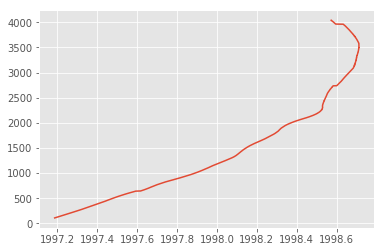

In [56]:
yLow = int(dMap.findPoint(ft,630).getY()) #ftFunction.yCenter + ftFunction.yLow
yHigh = int(dMap.findPoint(ft,970).getY())
print(yLow, yHigh)
offset = 50
print(dMap.findWavelength(ft,yLow+offset ))
plt.plot(xCenters[yLow+offset:yHigh],np.arange(yLow+offset, yHigh))

In [57]:
waveLow = 380
waveHigh = 650

In [58]:
waveLow = 704
waveHigh = 894

In [40]:
wMean = np.mean(waveband)
print(wMean)

NameError: name 'waveband' is not defined

In [59]:
xwMean = []
for f in dMap.getFiberId():
    xwMean.append(dMap.findPoint(f,630).getX()) 

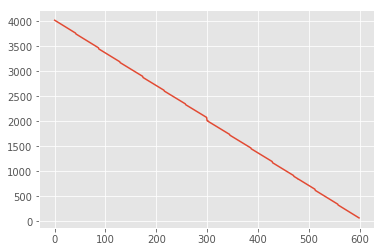

In [60]:
plt.plot(xwMean)

In [173]:
edgeX = []
edgeY = []

for f in dMap.getFiberId():
    edgeX.append(dMap.findPoint(f,waveLow).getX())
    edgeY.append(dMap.findPoint(f,waveLow).getY()) 

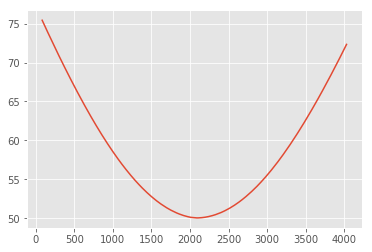

In [174]:
plt.plot(edgeX, edgeY)

In [175]:
edgeX = []
edgeY = []

for f in dMap.getFiberId():
    edgeX.append(dMap.findPoint(f,waveHigh).getX())
    edgeY.append(dMap.findPoint(f,waveHigh).getY()) 

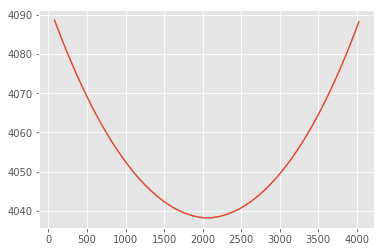

In [176]:
plt.plot(edgeX, edgeY)

In [177]:
np.arange(0,20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

72 4088
379.9746398925781
75 4088
379.9665222167969


(1, 4176)

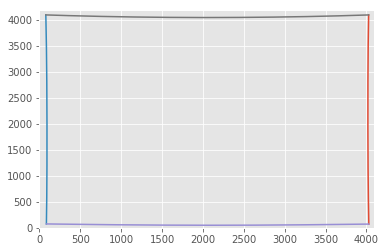

In [178]:
ft = 2
xCenters = dMap.getXCenter(ft)
yLow = int(dMap.findPoint(ft,waveLow).getY()) #ftFunction.yCenter + ftFunction.yLow
yHigh = int(dMap.findPoint(ft,waveHigh).getY())
print(yLow, yHigh)
offset = 0
print(dMap.findWavelength(ft,yLow+offset ))
plt.plot(xCenters[yLow+offset:yHigh], np.arange(yLow, yHigh))

ft = 650
xCenters = dMap.getXCenter(ft)
yLow = int(dMap.findPoint(ft,waveLow).getY()) #ftFunction.yCenter + ftFunction.yLow
yHigh = int(dMap.findPoint(ft,waveHigh).getY())
print(yLow, yHigh)
offset = 0
print(dMap.findWavelength(ft,yLow+offset ))
plt.plot(xCenters[yLow+offset:yHigh], np.arange(yLow, yHigh))

edgeX = []
edgeY = []

for f in dMap.getFiberId():
    edgeX.append(dMap.findPoint(f,waveLow).getX())
    edgeY.append(dMap.findPoint(f,waveLow).getY()) 
plt.plot(edgeX, edgeY)

edgeX = []
edgeY = []

for f in dMap.getFiberId():
    edgeX.append(dMap.findPoint(f,waveHigh).getX())
    edgeY.append(dMap.findPoint(f,waveHigh).getY()) 
plt.plot(edgeX, edgeY)

plt.xlim(1,4095 )
plt.ylim(1,4176 )


In [47]:
display.erase()

In [48]:
fibers = [2, 650]
with display.Buffering():
    for ft in fibers:
        print(ft)
        xCenters = dMap.getXCenter(ft)
#        ftFunction = ft.getFiberTraceFunction()
        yLow = int(dMap.findPoint(ft,waveLow).getY()) #ftFunction.yCenter + ftFunction.yLow
        yHigh = int(dMap.findPoint(ft,waveHigh).getY())
        for y in range(yLow, yHigh):
            pointA = [xCenters[y-yLow], y]
            if xCenters[y-yLow] < np.median(xCenters)+12:
                pointB = [xCenters[y-yLow+1], y+1]
                points = [pointA, pointB]
                display.line(points, ctype='red')

2
650


In [49]:
waves = [waveLow,waveHigh]
with display.Buffering():
    for wave in waves:
        print(wave)
        for f in dMap.getFiberId():
            x = int(dMap.findPoint(f,wave).getX())
            y = int(dMap.findPoint(f,wave).getY())
            display.dot("-",
                        x,
                        y,
                        ctype='green')

704
894


In [113]:
xCenters

array([2076.5654, 2076.565 , 2076.5647, ..., 2077.429 , 2077.43  ,
       2077.4307], dtype=float32)


# SPS-REQ-303 Image centering and spectrum orientation
## Requirement

SPS-REQ-303: The produced image shall be centered with respect to the detector array center to within +/-250m in the spatial and spectral directions. The spectrum shall be aligned with a row of pixels to within 60microns.



# Spectral alignment 


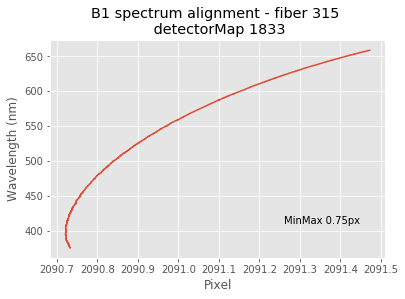

In [180]:
ft= 315
w = dMap.getWavelength(ft)
xCenters = dMap.getXCenter(ft)
#plt.xlim(xCenters.mean() - row_spec_px -0.5, xCenters.mean() + row_spec_px +0.5)
plt.plot(xCenters, w)
#plt.vlines([xCenters.mean() - row_spec_px, xCenters.mean() + row_spec_px], waveLow, waveHigh )
plt.xlabel("Pixel")
plt.ylabel("Wavelength (nm)")
spec_align_deviation = np.abs(np.min(xCenters)-np.max(xCenters))
plt.annotate(f"MinMax {spec_align_deviation:.2f}px", (0.7, 0.25), xycoords="figure fraction")
plt.title(f"{cam.upper()} spectrum alignment - fiber {ft} \n detectorMap {dmapvisitId}")
plt.savefig(imgPath+f"{cam.upper()}specAlign_f{ft}-detectorMap{dmapvisitId}"+".png", bbox_inches = "tight")

In [181]:
ft = 2
yLow_fib2 = int(dMap.findPoint(ft,waveLow).getY()) #ftFunction.yCenter + ftFunction.yLow
yHigh_fib2 = int(dMap.findPoint(ft,waveHigh).getY())

ft = 650
yLow_fib650 = int(dMap.findPoint(ft,waveLow).getY()) #ftFunction.yCenter + ftFunction.yLow
yHigh_fib650 = int(dMap.findPoint(ft,waveHigh).getY())


In [182]:
waveMid = waveLow + (waveHigh - waveLow) /2.
ft = 2
xMed_fib2 = int(dMap.findPoint(ft,waveMid).getX()) #ftFunction.yCenter + ftFunction.yLow

ft = 650
xMed_fib650 = int(dMap.findPoint(ft,waveMid).getX()) #ftFunction.yCenter + ftFunction.yLow

print(naxis1 - xMed_fib2, xMed_fib650)

# decenter is given by comparing the margin there between the side of the detector and spectrum of the 2 extermes sciences fibers 2 and 650
# xdim so naxis1 - x of fiber #2 for center wave 
# 

spatial_decenter = (naxis1 - xMed_fib2) - xMed_fib650
print(f"spatial decenter: {spatial_decenter}px")

ft = 650
yHigh_fib339 = int(dMap.findPoint(ft,waveLow).getY())
yLow_fib339 = int(dMap.findPoint(ft,waveHigh).getY())

spectral_decenter_ft650 = (naxis2 - yHigh_fib339) - yLow_fib339
print(f"spectral decenter: {spectral_decenter_ft650}px")

ft = 2
yHigh_fib339 = int(dMap.findPoint(ft,waveLow).getY())
yLow_fib339 = int(dMap.findPoint(ft,waveHigh).getY())

spectral_decenter_ft2 = (naxis2 - yHigh_fib339) - yLow_fib339
print(f"spectral decenter: {spectral_decenter_ft2}px")

79 92
spatial decenter: -13px
spectral decenter: 13px
spectral decenter: 16px


In [183]:
xMed_fib2 - xMed_fib650

3925

72 4088
379.9746398925781
75 4088
379.9665222167969


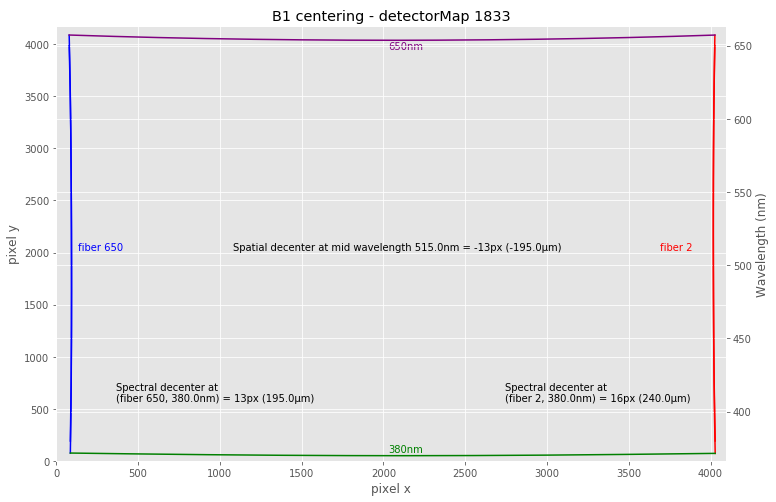

In [184]:
fig, ax = plt.subplots(figsize=(12,8))
ft = 2
xCenters = dMap.getXCenter(ft)
yLow = int(dMap.findPoint(ft,waveLow).getY()) #ftFunction.yCenter + ftFunction.yLow
yHigh = int(dMap.findPoint(ft,waveHigh).getY())
print(yLow, yHigh)
offset = 0
print(dMap.findWavelength(ft,yLow+offset ))
ax.plot(xCenters[yLow+offset:yHigh], np.arange(yLow, yHigh), color="red")
ax.annotate(f"fiber {ft}",  xy=(.85,.5),xycoords="figure fraction", color="red")
ax2 =ax.twinx()
xCenters = dMap.getXCenter(ft)
w = dMap.getWavelength(ft)
ax2.plot(xCenters[yLow+offset:yHigh], w[yLow+offset:yHigh], color="red")


ft = 650
xCenters = dMap.getXCenter(ft)
yLow = int(dMap.findPoint(ft,waveLow).getY()) #ftFunction.yCenter + ftFunction.yLow
yHigh = int(dMap.findPoint(ft,waveHigh).getY())
print(yLow, yHigh)
offset = 0
print(dMap.findWavelength(ft,yLow+offset ))
ax.plot(xCenters[yLow+offset:yHigh], np.arange(yLow, yHigh), color="blue")
ax.annotate(f"fiber {ft}",  xy=(.1,.5),xycoords="figure fraction", color="blue")
xCenters = dMap.getXCenter(ft)
w = dMap.getWavelength(ft)
ax2.plot(xCenters[yLow+offset:yHigh], w[yLow+offset:yHigh], color="blue")

edgeX = []
edgeY = []

for f in dMap.getFiberId():
    edgeX.append(dMap.findPoint(f,waveLow).getX())
    edgeY.append(dMap.findPoint(f,waveLow).getY()) 
ax.plot(edgeX, edgeY, color="green")
ax.annotate(f"{waveLow}nm",  xy=(.5,.1),xycoords="figure fraction", color="green")

#ax3 = ax.twiny()
#ax3.plot(dMap.getFiberId(), edgeY)
edgeX = []
edgeY = []

for f in dMap.getFiberId():
    edgeX.append(dMap.findPoint(f,waveHigh).getX())
    edgeY.append(dMap.findPoint(f,waveHigh).getY()) 
ax.plot(edgeX, edgeY, color="purple")
ax.annotate(f"{waveHigh}nm",  xy=(.5,.9),xycoords="figure fraction", color="purple")

#ax3.plot(dMap.getFiberId(), edgeY)

ax.set_xlim(1,4095 )
ax.set_ylim(1,4176 )
#ax3.set_xlim(dMap.getFiberId()[-1], dMap.getFiberId()[0])
ax.set_xlabel("pixel x")
ax.set_ylabel("pixel y")
ax2.set_ylabel("Wavelength (nm)")
plt.annotate(f"Spatial decenter at mid wavelength {waveMid:.1f}nm = {spatial_decenter}px ({spatial_decenter*pix_size:.1f}µm)", (0.3, 0.5), xycoords="figure fraction")
plt.annotate(f"Spectral decenter at \n(fiber 2, {waveLow:.1f}nm) = {spectral_decenter_ft2}px ({spectral_decenter_ft2*pix_size:.1f}µm)", (0.65, 0.2), xycoords="figure fraction")
plt.annotate(f"Spectral decenter at \n(fiber 650, {waveLow:.1f}nm) = {spectral_decenter_ft650}px ({spectral_decenter_ft650*pix_size:.1f}µm)", (0.15, 0.2), xycoords="figure fraction")

plt.title(f"{cam.upper()} centering - detectorMap {dmapvisitId}")
plt.savefig(imgPath+f"{cam.upper()}centering-detectorMap{dmapvisitId}"+".png", bbox_inches = "tight")

In [65]:
# Mark FiberTrace centers in image
with display.Buffering():
    for ft in fibers:
        print(ft)
        xCenters = dMap.getXCenter(ft)
#        ftFunction = ft.getFiberTraceFunction()
        yLow = int(dMap.findPoint(ft,waveLow)[1]) #ftFunction.yCenter + ftFunction.yLow
        yHigh = int(dMap.findPoint(ft,waveHigh)[1]) #ftFunction.yCenter + ftFunction.yHigh

        for y in range(yLow, yHigh):
            pointA = [xCenters[y-yLow], y]
            pointB = [xCenters[y-yLow+1], y+1]
            points = [pointA, pointB]
            display.line(points, ctype='red')

2
650


In [ ]:
display.

In [66]:
edgeX = []
edgeY = []

for f in dMap.getFiberId():
    edgeX.append(dMap.findPoint(f,970).getX())
    edgeY.append(dMap.findPoint(f,970).getY()) 

In [67]:
dMap.findPoint(ft,970)

Point2D(65.03744332, 4106.40019)

In [68]:
mask = calExp.mask.array
data = calExp.image.array
threshold = 1000
objects = sep.extract(data , threshold, mask=mask) #, filter_kerneµl=None)

In [69]:
with display.Buffering():
    for i in range(len(objects)):
        display.dot("+",
                   objects['x'][i],
                   objects['y'][i],
                   ctype="green")
        display.dot("O",
                   objects['x'][i],
                   objects['y'][i],
                   ctype="green")

In [105]:
df = pd.DataFrame(objects, columns=objects.dtype.names)

In [106]:
df = df.rename(columns={'x': 'px','y': 'py', 'peak': 'brightness'})

In [107]:
df["fiber"]= df.apply(lambda x: dMap.findFiberId(geom.Point2D(float(x["px"]), float(x["py"]))), axis=1)

In [108]:
df["wavelength"]= df.apply(lambda x: dMap.getWavelength(int(x["fiber"]), float(x["py"])), axis=1)

In [115]:
fiber = 339

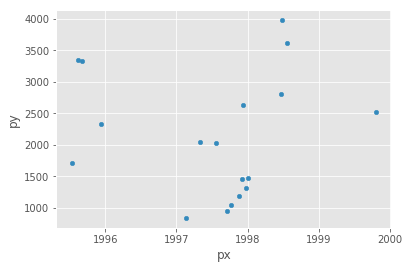

In [116]:
ax = df[(df.flag <1) & (df.fiber == fiber)].plot.scatter(x="px", y="py")
#ax2 = ax.twiny()
#df[df.fiber == fiber].plot.scatter(x="py", y="brightness", ax=ax2)
#ax.hlines(2000, df.wavelength.min(), df.wavelength.max(), colors="r")